## Predicting Number of Fatalities from Factors of Tornadic Event

##  Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

In [2]:
data = pd.read_csv("Tornado_Tracks.csv")

In [3]:
data

,FID,torn_num,yr,mo,dy,date,time,time_zone,state,statefips,...,slat,slon,elat,elon,len,wid,fc,Month_Calc,Date_Calc,SHAPE_Length
0,1,134,1951,6,9,6/9/1951,5:30:00,3,MS,28,...,32.9000,-90.7200,32.9001,-90.7199,2.00,10,1,5,1951/06/09 04:00:01+00,0.000141
1,2,135,1951,6,9,6/9/1951,17:00:00,3,NC,37,...,36.0000,-78.3300,36.0300,-78.2800,3.80,30,0,5,1951/06/09 04:00:01+00,0.058310
2,3,189,1951,7,13,7/13/1951,20:00:00,3,NE,31,...,41.2300,-102.5800,41.2301,-102.5799,0.10,10,0,6,1951/07/13 04:00:01+00,0.000141
3,4,190,1951,7,15,7/15/1951,16:20:00,3,OK,40,...,34.8000,-94.8000,34.8001,-94.7999,0.10,100,0,6,1951/07/15 04:00:01+00,0.000141
4,5,191,1951,7,15,7/15/1951,16:20:00,3,OK,40,...,34.8000,-94.8000,34.8001,-94.7999,0.10,100,0,6,1951/07/15 04:00:01+00,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66239,66240,619522,2020,9,1,9/1/2020,18:10:00,3,TX,48,...,34.5706,-100.8394,34.5706,-100.8394,0.01,30,0,8,2020/09/01 03:59:59+00,0.000000
66240,66241,619523,2020,9,3,9/3/2020,15:57:00,3,MD,24,...,38.9480,-76.5695,38.9233,-76.4615,6.05,100,0,8,2020/09/03 03:59:59+00,0.110788
66241,66242,619524,2020,9,5,9/5/2020,16:17:00,3,CA,6,...,37.3500,-119.3400,37.5218,-119.3056,12.02,50,0,8,2020/09/05 03:59:59+00,0.175210
66242,66243,619525,2020,9,5,9/5/2020,18:29:00,3,CA,6,...,37.2500,-119.2000,37.2598,-119.1838,1.12,25,0,8,2020/09/05 03:59:59+00,0.018934


## EDA

Text(0.5, 1.0, 'Number of Tornados Since 1951 by State')

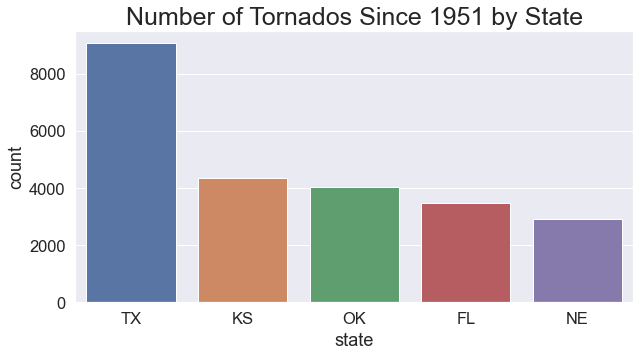

In [4]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.countplot(x = 'state', data = data, order = data['state'].value_counts().iloc[:5].index)
plt.title('Number of Tornados Since 1951 by State', fontsize=25)

Text(0.5, 1.0, 'Average Number of Fatalities by Tornado Magnitude')

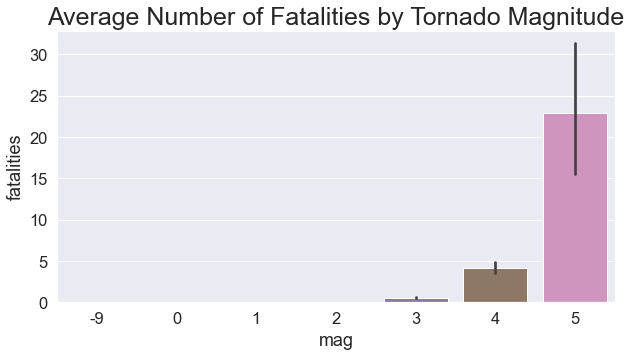

In [5]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'mag', y='fatalities', data = data, ci=95)
plt.title('Average Number of Fatalities by Tornado Magnitude', fontsize=25)

Text(0.5, 1.0, 'Top 5 Years with Highest Average Number Fatalities')

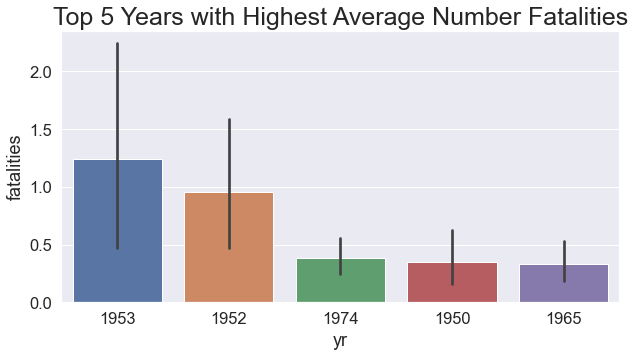

In [6]:
order = data.groupby('yr').mean().sort_values('fatalities', ascending = False).iloc[:5].index
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'yr', y='fatalities', data = data, ci=95, order = order)
plt.title('Top 5 Years with Highest Average Number Fatalities', fontsize=25)

Text(0.5, 1.0, 'Average Number of Injuries by Magnitude')

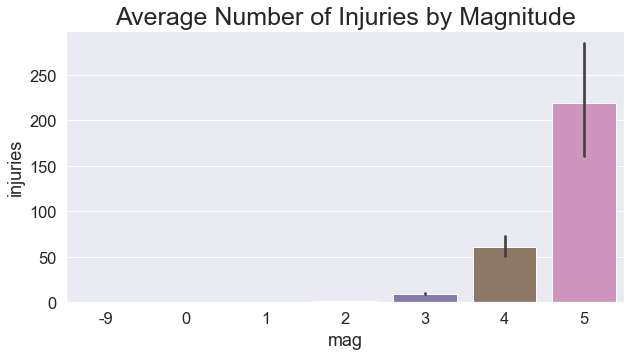

In [7]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'mag', y='injuries', data = data, ci=95)
plt.title('Average Number of Injuries by Magnitude', fontsize=25)

Text(0.5, 1.0, 'Average Number of Fatalities by Month')

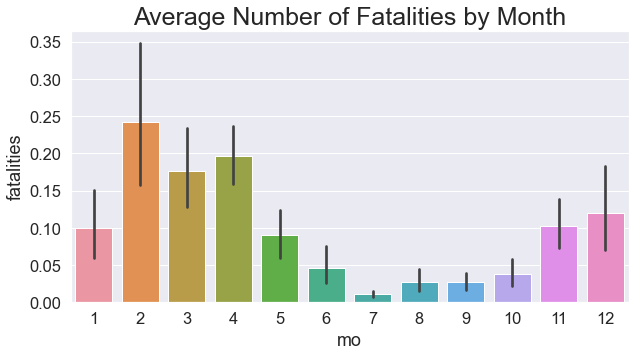

In [8]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'mo', y='fatalities', data = data)
plt.title('Average Number of Fatalities by Month', fontsize=25)

Text(0.5, 1.0, 'Average Number of Injuries by Month')

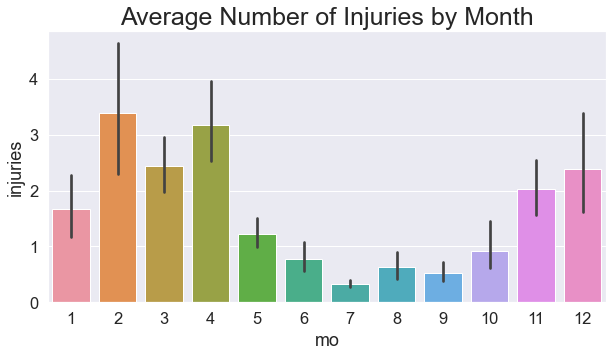

In [9]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'mo', y='injuries', data = data)
plt.title('Average Number of Injuries by Month', fontsize=25)

Text(0.5, 1.0, 'Number of Tornados Since 1951 by Year')

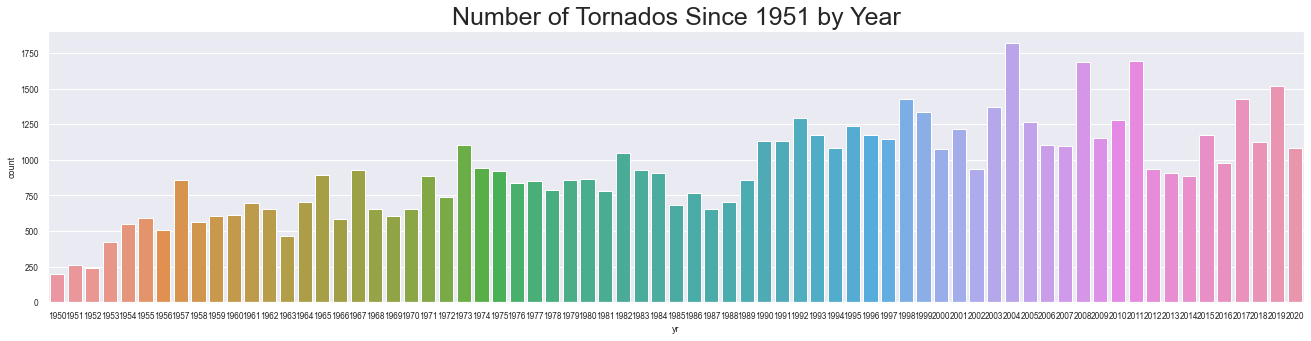

In [10]:
sns.set(rc={"figure.figsize":(22.5, 5)}, font_scale = .75) 
sns.countplot(x = 'yr', data = data)
plt.title('Number of Tornados Since 1951 by Year', fontsize=25)

Text(0.5, 1.0, 'Average Number of Injuries by Tornado Width')

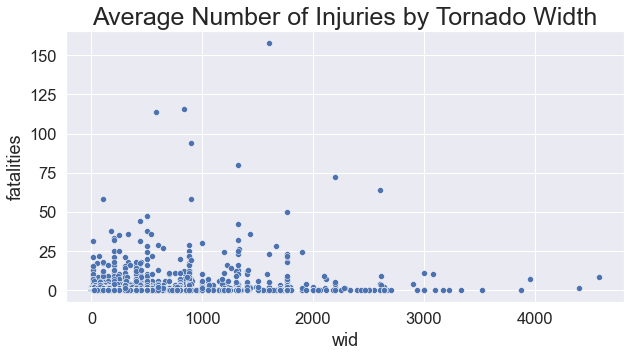

In [11]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.scatterplot(x = 'wid', y='fatalities', data = data)
plt.title('Average Number of Injuries by Tornado Width', fontsize=25)

Text(0.5, 1.0, 'Top 5 States with Highest Average Number of Fatalities')

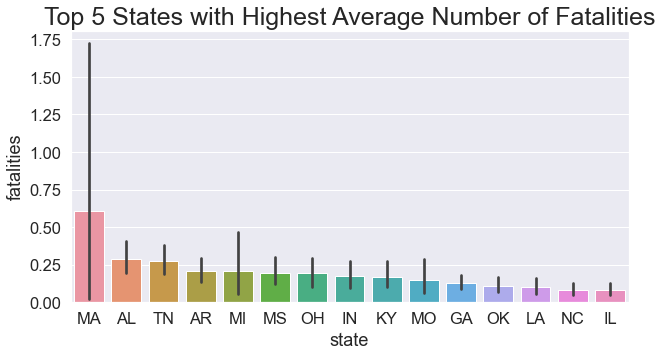

In [12]:
order = data.groupby('state').mean().sort_values('fatalities', ascending = False).iloc[:15].index
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'state', y='fatalities', data = data, ci=95, order = order)
plt.title('Top 5 States with Highest Average Number of Fatalities', fontsize=25)

In [13]:
data.drop(['FID','torn_num','state','yr','dy','date','closs','time','loss','state_num',
           'injuries','slat','slon','elat','elon','fc','Month_Calc','Date_Calc','SHAPE_Length'],axis=1, inplace=True)

In [14]:
data

,mo,time_zone,statefips,mag,fatalities,len,wid
0,6,3,28,0,0,2.00,10
1,6,3,37,1,0,3.80,30
2,7,3,31,0,0,0.10,10
3,7,3,40,2,0,0.10,100
4,7,3,40,0,0,0.10,100
...,...,...,...,...,...,...,...
66239,9,3,48,-9,0,0.01,30
66240,9,3,24,0,0,6.05,100
66241,9,3,6,2,0,12.02,50
66242,9,3,6,1,0,1.12,25


## Splitting Data into Test and Train Datasets

In [15]:
X = data.drop(['fatalities'], axis=1)
y = data['fatalities']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)

In [17]:
X_train.shape, X_test.shape


((52995, 6), (13249, 6))

## Data Modeling

In [18]:
rfc = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state = 0)
xgbr = xg.XGBRegressor()

In [19]:
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(mean_absolute_error(y_test,y_pred_rfc))

0.13006195448348462


In [20]:
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print(mean_absolute_error(y_test,y_pred_gb))

0.1308290993675144


In [21]:
xgbr.fit(X_train,y_train)
y_pred_xgbr=xgbr.predict(X_test)
print(mean_absolute_error(y_test,y_pred_xgbr))

0.13744581968083272


### Random forest regressor had the least mean absolute error

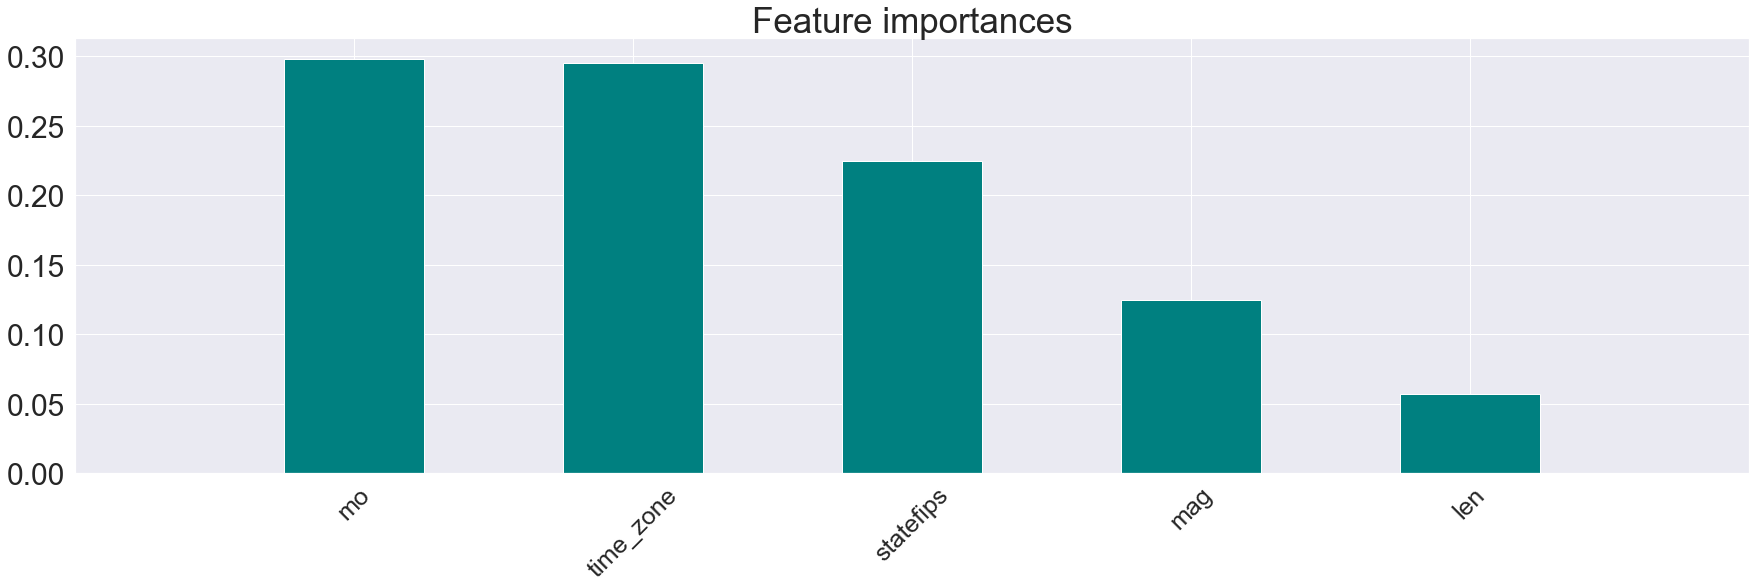

In [22]:
features = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_names = [col for col in X_train]
feature_importance = features
indices = np.argsort(feature_importance)[::-1]
n=5
idx=indices[0:n]

plt.figure(figsize=(30, 8))
titlefont = 35
plt.title("Feature importances", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importance[idx], color="teal", width=0.5, align="center")
xticksize = 25
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=30)
plt.xlim([-1, n]) 
plt.show()

## Implications

Interestingly, a tornado's magnitude was not the most important feature in predicting number of fatalities from a tornado.  The month, time zone, and state were all more predictive power.  All else being equal, magnitude should be the most predictive factor, along with length and width of the tornado's path.  Of course, there is variability in what lies in the path of a tornado.  It is not always the case that a tornado's path overlaps with major city centers, major highways, and so on.  